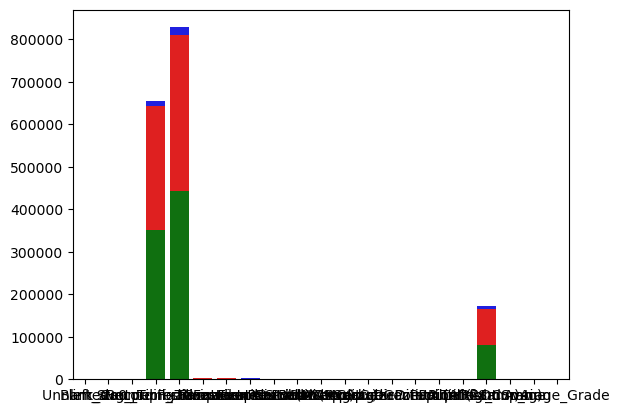

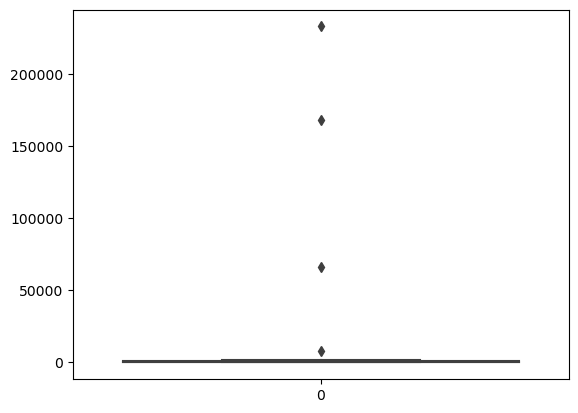

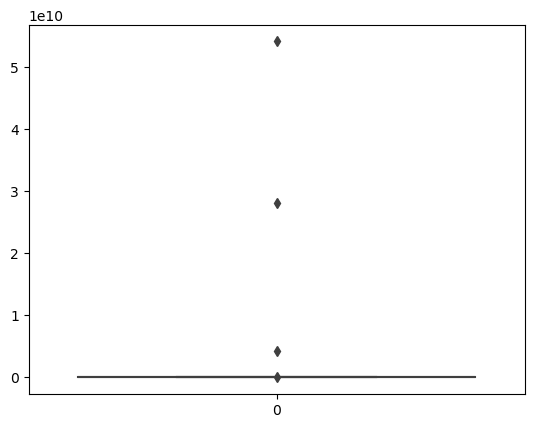

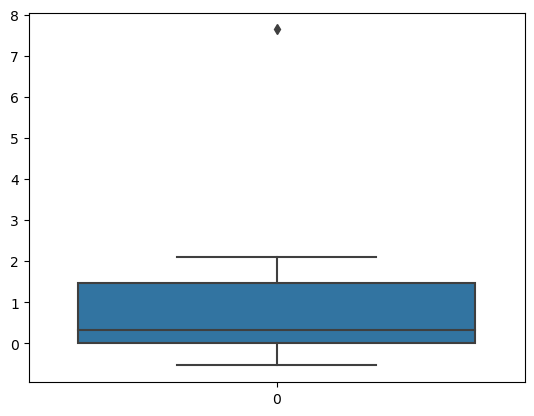

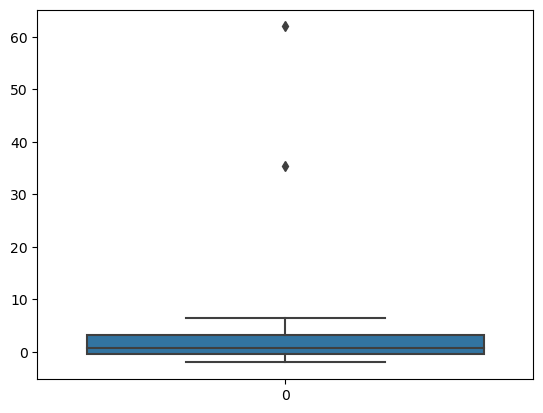

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Load your dataset into a pandas dataframe
df = pd.read_csv("C:\\Users\\Jeremy_Constantin\\Desktop\\Data_Jeremy.csv")

# Create a dictionary to store the extracted values
measures = {}

# Extract measures of central tendency for numerical data
numerical_columns = df.select_dtypes(include=['float64','int64']).columns
for col in numerical_columns:
    measures[col] = {}
    measures[col]['mean'] = df[col].mean()
    measures[col]['median'] = df[col].median()
    measures[col]['mode'] = df[col].mode()[0]

# Extract measures of dispersion for numerical data
    measures[col]['std'] = df[col].std()
    measures[col]['var'] = df[col].var()
    measures[col]['skewness'] = df[col].skew()
    measures[col]['kurtosis'] = df[col].kurt()

# Extract measures of quantiles for numerical data
    measures[col]['q1'] = df[col].quantile(0.25)
    measures[col]['q2'] = df[col].quantile(0.50)
    measures[col]['q3'] = df[col].quantile(0.75)

# Extract measures of range for numerical data
    measures[col]['min_value'] = df[col].min()
    measures[col]['max_value'] = df[col].max()
    measures[col]['range_value'] = measures[col]['max_value'] - measures[col]['min_value']

# Extract measures of central tendency for categorical data
categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    measures[col] = {}
    measures[col]['value_counts'] = df[col].value_counts()

# Plot the mean, median, and mode of numerical columns
sns.barplot(x = numerical_columns, y = [measures[col]['mean'] for col in numerical_columns], color = 'b')
sns.barplot(x = numerical_columns, y = [measures[col]['median'] for col in numerical_columns], color = 'r')
sns.barplot(x = numerical_columns, y = [measures[col]['mode'] for col in numerical_columns], color = 'g')
plt.show()

# Plot the standard deviation, variance, skewness, and kurtosis of numerical columns
sns.boxplot(data = [measures[col]['std'] for col in numerical_columns])
plt.show()
sns.boxplot(data = [measures[col]['var'] for col in numerical_columns])
plt.show()
sns.boxplot(data = [measures[col]['skewness'] for col in numerical_columns])
plt.show()
sns.boxplot(data = [measures[col]['kurtosis'] for col in numerical_columns])
plt.show()


In [8]:
from prettytable import PrettyTable

# Create a table to display the mean, median, and mode of numerical columns
table = PrettyTable()
table.field_names = ["Column", "Mean", "Median", "Mode"]
for col in numerical_columns:
    table.add_row([col, measures[col]['mean'], measures[col]['median'], measures[col]['mode']])
print(table)

# Create a table to display the standard deviation, variance, skewness, and kurtosis of numerical columns
table = PrettyTable()
table.field_names = ["Column", "Standard Deviation", "Variance", "Skewness", "Kurtosis"]
for col in numerical_columns:
    table.add_row([col, measures[col]['std'], measures[col]['var'], measures[col]['skewness'], measures[col]['kurtosis']])
print(table)

+----------------------------------+-------------------------+------------------------+---------------------+
|              Column              |           Mean          |         Median         |         Mode        |
+----------------------------------+-------------------------+------------------------+---------------------+
|            Unnamed: 0            |           36.0          |          36.0          |          0          |
|          Blink_Counter           |    960.0688958813963    |         684.0          |         42.0        |
|       left_avg_pupil_dill        | -1.3671455355959058e-08 | 1.3509291035220196e-07 | -0.0001112132226021 |
|         Start_Timestamp          |     655585.75663288     |   643526.5889336346    |  352173.3494517002  |
|        RecordingTimestamp        |    828965.6395938683    |   811249.4533089071    |  442784.95524931146 |
|          FixationIndex           |    2163.1361198709037   |   2060.896579154456    |  889.3513588465055  |
|         

In [10]:
import pandas as pd
import numpy as np

# Load your small dataset into a pandas dataframe
df = pd.read_csv("C:\\Users\\Jeremy_Constantin\\Desktop\\Data_Jeremy.csv")

# Extract statistical information from the dataset
means = df.mean()
stds = df.std()
medians = df.median()
mode = df.mode()

# Create an empty dataframe to store the new data
new_data = pd.DataFrame(columns=df.columns)

# Define the number of new data points to generate
n = 1000

# Generate new data points for each column using bootstrapping
for col in df.columns:
    if df[col].dtype == 'float64':
        new_data[col] = np.random.choice(df[col], size=n, replace=True)
    else:
        new_data[col] = np.random.choice(df[col], size=n, replace=True)

# Append the new data to the original dataset
expanded_dataset = df.append(new_data)

# Save the expanded dataset to a csv file
#expanded_dataset.to_csv('expanded_dataset.csv', index=False)

C:\Users\Jeremy_Constantin\AppData\Local\Temp\ipykernel_40808\618331378.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  means = df.mean()
C:\Users\Jeremy_Constantin\AppData\Local\Temp\ipykernel_40808\618331378.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  stds = df.std()
C:\Users\Jeremy_Constantin\AppData\Local\Temp\ipykernel_40808\618331378.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  medians = df.median()
C:\Users\Jeremy_Constantin\AppData\Local\Temp\ipykernel_40808

In [11]:
new_data2 = pd.DataFrame(columns=df.columns)
# Generate new data points for each column using simulation
for col in df.columns:
    if df[col].dtype == 'float64':
        data = np.random.normal(means[col], stds[col], size=n)
        #data = np.concatenate([data,np.random.normal(medians[col], stds[col], size=n),np.random.normal(mode[col].iloc[0], stds[col], size=n)])
        new_data2[col] = data
    else:
        new_data2[col] = np.random.choice(df[col].unique(), size=n)

# Append the new data to the original dataset
expanded_dataset2 = df.append(new_data2)

# Save the expanded dataset to a csv file
#expanded_dataset2.to_csv('expanded_dataset.csv', index=False)

C:\Users\Jeremy_Constantin\AppData\Local\Temp\ipykernel_40808\428812463.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  expanded_dataset2 = df.append(new_data2)


In [12]:
expanded_dataset

,Unnamed: 0,ParticipantName,Blink_Counter,left_avg_pupil_dill,Start_Timestamp,RecordingTimestamp,FixationIndex,SaccadeIndex,GazeEventDuration,FixationPointX (MCSpx),...,AbsoluteSaccadicDirection,RelativeSaccadicDirection,StrictAverageGazePointX (ADCSmm),StrictAverageGazePointY (ADCSmm),PupilLeft,PupilRight,Timestamp_n,fix_duration,Age,Average_Grade
0,0,o01.01.A,3037.50000,-2.069561e-06,8.903217e+05,1.137997e+06,1923.849646,3727.393615,10190.170253,590.726148,...,170.010667,176.763975,1011.139703,642.935372,4.012156,3.594565,247674.897522,148.917205,1,0.604101
1,1,o02.01.A,2343.50000,-2.628735e-06,6.377481e+05,7.952424e+05,1955.450345,2682.489554,420.475226,611.353925,...,192.294595,180.570159,1047.203635,569.357828,4.800838,5.002688,157494.276108,142.892495,1,0.363703
2,2,o03.01.A,5455.50000,-4.339637e-06,7.381119e+05,9.366817e+05,2040.530155,3167.136285,371.196991,593.692993,...,174.481227,177.995849,1049.849693,549.000129,5.382580,4.920290,198569.782290,141.628203,1,0.582695
3,3,o04.02.A,63.50000,4.963551e-08,1.270209e+06,1.692247e+06,4809.399911,7401.217459,410.780947,594.793215,...,173.526598,183.534568,1076.755042,625.691390,3.133993,3.045703,422038.090888,160.179908,1,0.631835
4,4,o05.02.A,1844.56879,-2.646829e-06,6.525738e+05,8.211633e+05,2264.712946,7063.154909,432.844595,555.663473,...,185.469241,178.015898,1000.450549,603.562908,3.556163,3.522000,168589.578579,141.178892,1,0.534927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,52,y14.03.A,995.00000,-2.964580e-06,6.525738e+05,6.481532e+05,2004.006218,1785.222261,1387.577006,658.675395,...,174.768205,184.784432,1098.780843,627.346826,4.206064,4.236181,159282.687518,148.277043,1,0.546551
996,23,y23.05.A,95.00000,1.271692e-06,6.721775e+05,7.952424e+05,2626.812168,2119.277866,267.277969,658.675395,...,174.768205,180.058852,1056.669542,558.137617,4.394565,2.488968,146826.343342,143.432492,0,0.362051
997,48,o04.02.A,845.50000,2.270019e-06,5.279090e+05,6.071872e+05,1792.452029,1836.860373,463.121372,600.059944,...,173.778736,178.799220,1026.651626,619.061931,4.361380,3.267859,118959.953117,145.598831,1,0.570823
998,5,y06.02.A,897.50000,-2.628735e-06,8.781668e+05,5.022334e+05,1250.871318,2857.954476,369.463197,590.726148,...,173.962930,190.607325,1040.333436,637.944476,2.986767,3.537815,115808.583509,141.433451,0,0.649202


# Prediction on Fictional Data 

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
classifier = KNeighborsClassifier(n_neighbors=24, p = 1, leaf_size = 1)

X = expanded_dataset.loc[:, df.columns != 'Average_Grade']
X = X.drop(['ParticipantName'], axis=1)
X = X.drop(['Unnamed: 0'], axis=1)
X
y = expanded_dataset[['Average_Grade']]

def condition(x):
    if x>0.7:
        return "A"
    elif x>=0.5 and x<=0.7:
        return "B"
    elif x< 0.5 and x>=0.3 :
        return 'C'
    else :
        return 'C'
        #return 'D'
    
temp = expanded_dataset[['Average_Grade']]
temp = pd.DataFrame(temp,columns = ['Average_Grade'])
temp['Average_Grade'] = y['Average_Grade'].apply(condition)
y = temp

from sklearn.preprocessing import LabelEncoder
# Create the encoder
le = LabelEncoder()

# Encode the classes
y = le.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
classifier.fit(X_train, y_train) 

y_pred_best = classifier.predict(X_test)
# Create the encoder
le = LabelEncoder()
# Encode the classes
y_pred_best = le.fit_transform(y_pred_best)
print(classification_report(y_pred_best, y_test))

              precision    recall  f1-score   support

           0       0.02      0.07      0.03        14
           1       0.85      0.50      0.63       299
           2       0.14      0.43      0.21        42

    accuracy                           0.47       355
   macro avg       0.34      0.33      0.29       355
weighted avg       0.73      0.47      0.56       355



C:\Users\Jeremy_Constantin\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Jeremy_Constantin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


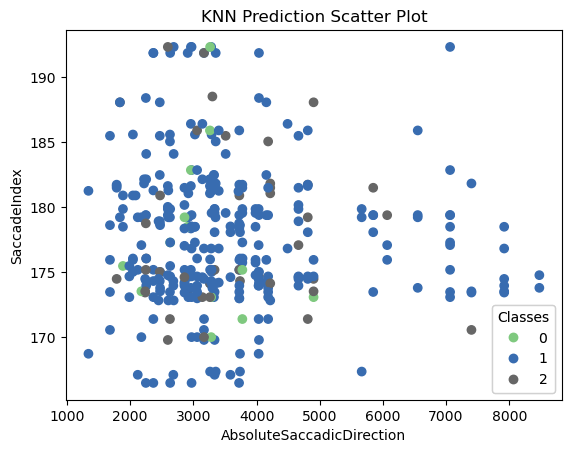

In [20]:
fig, ax = plt.subplots()

scatter = ax.scatter(X_test['SaccadeIndex'], X_test['AbsoluteSaccadicDirection'], c=y_pred_best, cmap='Accent')
plt.xlabel('AbsoluteSaccadicDirection')
plt.ylabel('SaccadeIndex')
plt.title('KNN Prediction Scatter Plot')
legend1 = plt.legend(*scatter.legend_elements(),
                    loc="lower right", title="Classes")
ax.add_artist(legend1)
plt.show()